In [50]:
import GO_Enrichment_Calculator
import Go_annotations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

In [3]:
gene_list = pd.read_csv('/data/passala/Coexpressolog_paper_data/Species_species_gene_tables/rice_maize_moderate_coexpressalog_table.csv')
gene_list

,rice gene,maize gene
0,Os01g0195400,Zm00001d008850
1,Os05g0199100,Zm00001d037751
2,Os01g0101600,Zm00001d008390
3,Os05g0566900,Zm00001d039041
4,Os01g0796400,Zm00001d012590
...,...,...
6324,BAC19863,GRMZM5G898647
6325,BAC19893,GRMZM5G867512
6326,BAC19869,GRMZM5G861791
6327,BAC19875,GRMZM5G804358


In [38]:
rice_gene_list_only = gene_list['rice gene'].to_list()


In [5]:
rice_go_annotations = Go_annotations.get_go_annotations_as_panda('rice')
rice_go_annotations

GO_term,GO:0000002,GO:0000003,GO:0000009,GO:0000012,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,...,GO:2001240,GO:2001242,GO:2001243,GO:2001251,GO:2001252,GO:2001253,GO:2001289,GO:2001293,GO:2001294,GO:2001295
NetworkIDs,,,,,,,,,,,,,,,,,,,,,
Os01g0100100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Os01g0100300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Os01g0100400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Os01g0100500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Os01g0100600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Os12g0640900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Os12g0641100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Os12g0641300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
rice_num_terms = rice_go_annotations.sum().T
rice_num_terms = pd.DataFrame(rice_num_terms, columns = ['Number Annotated Genes'])
rice_num_terms

,Number Annotated Genes
GO_term,
GO:0000002,3.0
GO:0000003,570.0
GO:0000009,2.0
GO:0000012,3.0
GO:0000014,7.0
...,...
GO:2001253,1.0
GO:2001289,2.0
GO:2001293,2.0


In [10]:
cont_tables = GO_Enrichment_Calculator.generate_contigency_tables(go_annotations=rice_go_annotations, gene_list= rice_gene_list_only)

In [11]:
pvals = GO_Enrichment_Calculator.fishers_exact_on_contigency_tables(all_go_contigency_tables=cont_tables,original_GO_term_panda=rice_go_annotations)

In [12]:
corrected_pvals = GO_Enrichment_Calculator.multi_hypothesis_correct_fishers_exact(go_terms_with_P_value = pvals)

In [13]:
corrected_pvals

,P_value
GO_term,
GO:0000002,0.892354
GO:0000003,0.034516
GO:0000009,0.763755
GO:0000012,0.496175
GO:0000014,0.890400
...,...
GO:2001253,0.554880
GO:2001289,0.763755
GO:2001293,0.763755


In [17]:
corrected_pvals['Number Annotated Genes'] = rice_num_terms['Number Annotated Genes']

In [18]:
corrected_pvals.sort_values(by = 'P_value')

,P_value,Number Annotated Genes
GO_term,,
GO:0005622,1.287138e-171,12371.0
GO:0043226,4.741643e-157,10912.0
GO:0043231,1.902163e-156,9079.0
GO:0043229,9.868467e-155,10826.0
GO:0043227,5.146990e-152,10394.0
...,...,...
GO:0016093,1.000000e+00,10.0
GO:0016052,1.000000e+00,269.0
GO:0016041,1.000000e+00,1.0


In [19]:
all_go_terms = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/go_terms.txt',sep = '\t')

In [20]:
named_go = corrected_pvals.merge(right = all_go_terms, left_index=True, right_index= True)

In [27]:
top_40_go = named_go.sort_values(by = 'P_value').loc[named_go['Number Annotated Genes']<300].head(40)

In [39]:
top_40_go['Neg Log P Val'] =-1* np.log10(top_40_go['P_value'])
top_40_go.head()

,P_value,Number Annotated Genes,Name,Neg Log P Val
GO:0009570,1.452199e-15,299.0,chloroplast stroma,14.837974
GO:0019866,5.651539e-13,247.0,organelle inner membrane,12.247833
GO:0016072,1.096060e-12,226.0,rRNA metabolic process,11.960165
GO:0005730,3.929319e-12,241.0,nucleolus,11.405683
GO:0006364,5.768348e-12,222.0,rRNA processing,11.238949


In [34]:
top_40_go.head(11)

,P_value,Number Annotated Genes,Name,Neg Log P Val
GO:0009570,1.452199e-15,299.0,chloroplast stroma,14.837974
GO:0019866,5.651539e-13,247.0,organelle inner membrane,12.247833
GO:0016072,1.096060e-12,226.0,rRNA metabolic process,11.960165
GO:0005730,3.929319e-12,241.0,nucleolus,11.405683
GO:0006364,5.768348e-12,222.0,rRNA processing,11.238949
GO:0034357,8.402710e-10,240.0,photosynthetic membrane,9.075581
GO:0005743,1.040022e-09,220.0,mitochondrial inner membrane,8.982958
GO:0098798,1.489193e-09,189.0,mitochondrial protein complex,8.827049
GO:0008380,1.959663e-09,237.0,RNA splicing,8.707819
GO:0005740,2.303586e-09,277.0,mitochondrial envelope,8.637596


<AxesSubplot:xlabel='Neg Log P Val', ylabel='Name'>

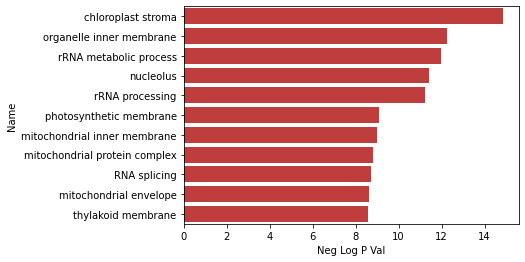

In [37]:
sns.barplot(data = top_40_go.head(11), x = 'Neg Log P Val',y = 'Name', color = 'tab:red')

In [ ]:
top_40_go

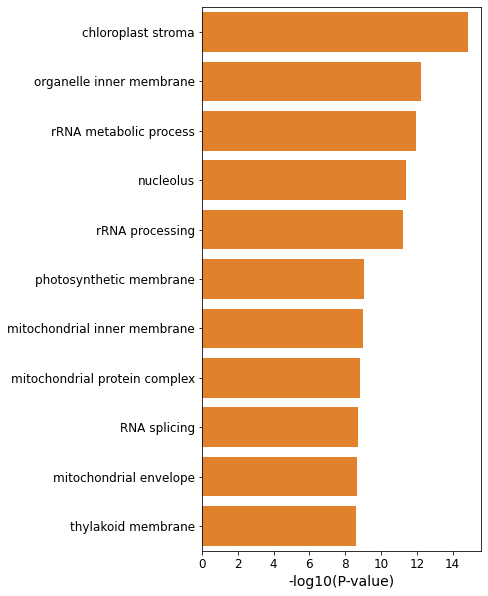

In [55]:
fig, ax = plt.subplots(figsize = (5,10))
fig.patch.set_facecolor('white')
ax = sns.barplot(data = top_40_go.head(11), x = 'Neg Log P Val',y = 'Name', color = 'tab:orange')
#plt.ylabel("Euclidian Distance of Coexpressalog from Target Gene", fontsize = 15)
plt.xlabel("-log10(P-value)", fontsize = 14)
ax.set(ylabel=None)
#sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
#ax.set_xscale('log')
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/go_enrichment.svg')